# Principal Components Analysis
Principal Component Analysis (PCA) is a statistical technique used to reduce the dimensionality of a dataset while preserving most of the variance. It transforms the original variables into a new set of uncorrelated variables called principal components, ordered by the amount of variance they capture from the data.

**Commoly use for:**

**1. Data Visualization:** Helps in visualizing high-dimensional data by projecting it onto 2D or 3D spaces, revealing patterns and clusters.

**2. Feature Extraction:** Identifies and constructs new features that summarize the original data, enhancing the performance of machine learning models.

In [1]:
import pandas as pd
df = pd.read_csv('fish2.csv')
print(df.shape)
df.sample(5)

(158, 7)


,Species,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
60,Parkki,55.0,13.5,14.7,16.5,6.8475,2.3265
36,Roach,69.0,16.5,18.2,20.3,5.2983,2.8217
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
84,Perch,130.0,19.3,21.3,22.8,6.3840,3.5340
73,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320


In [2]:
# Extract the numerical columns
X = df[['Cross_Length', 'Height']]
X.head()

,Cross_Length,Height
0,30.0,11.5200
1,31.2,12.4800
2,31.1,12.3778
3,33.5,12.7300
4,34.0,12.4440


In [3]:
# In PCA we need to standardized our features
mean = X.mean(axis=0)
sttd = X.std(axis=0)
X_standardized = (X - mean) / sttd
X_standardized.head(3)

,Cross_Length,Height
0,-0.110116,0.589778
1,-0.006913,0.813284
2,-0.015513,0.789490


In [4]:
from sklearn.decomposition import PCA
pca = PCA()

In [5]:
components = pca.fit(X_standardized).components_
components

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [21]:
# convert to dataframe without transpose 

# uncomment to view componenst without transpose
# components_noTrans = pd.DataFrame(components, columns = X.columns)
# components_noTrans.head()

In [6]:
# convert to dataframe then transpose 
components = pd.DataFrame(components).transpose()

# attached the original data_matrix column names  as index for better veiwing
components.index =  X.columns
components.head(7)

,0,1
Cross_Length,0.707107,0.707107
Height,0.707107,-0.707107


In this new dataframe we can see that 'Cross_lenght', 'Diagonal_Length', anf 'Vertical_Lenght' has the most variance score this means that this features are the mos explain

In PCA it takes all the features and compute for the variance. We have now 5 PCA's (0-4) and each PCA are rank according to their variance. We can veiw its variance in a scree plot. 

In [7]:
# using explained_variance_ratio_ property
var_ratio = pca.explained_variance_ratio_
var_ratio

array([0.85132738, 0.14867262])

PCA1 accounts for 87.8 of total variance

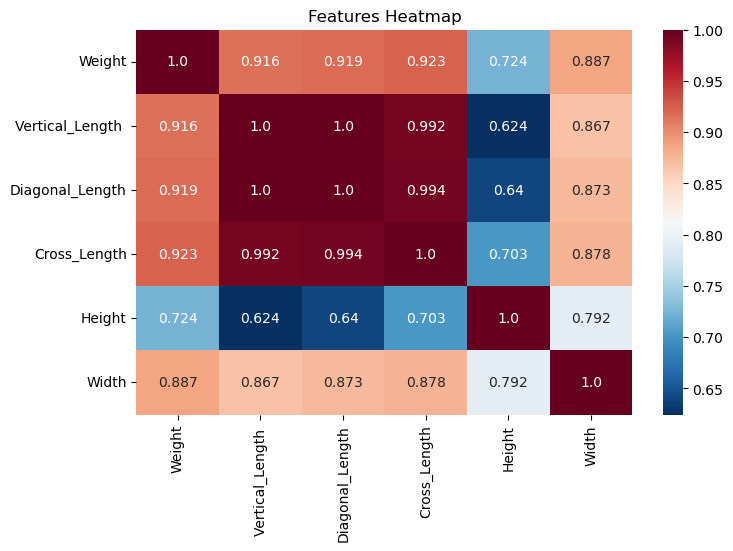

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

ax2= plt.figure(figsize=(8,5))
ax2=sns.heatmap(df.corr(), annot=True, fmt='.3', cmap='RdBu_r')
plt.title('Features Heatmap')
ax2=plt.show()


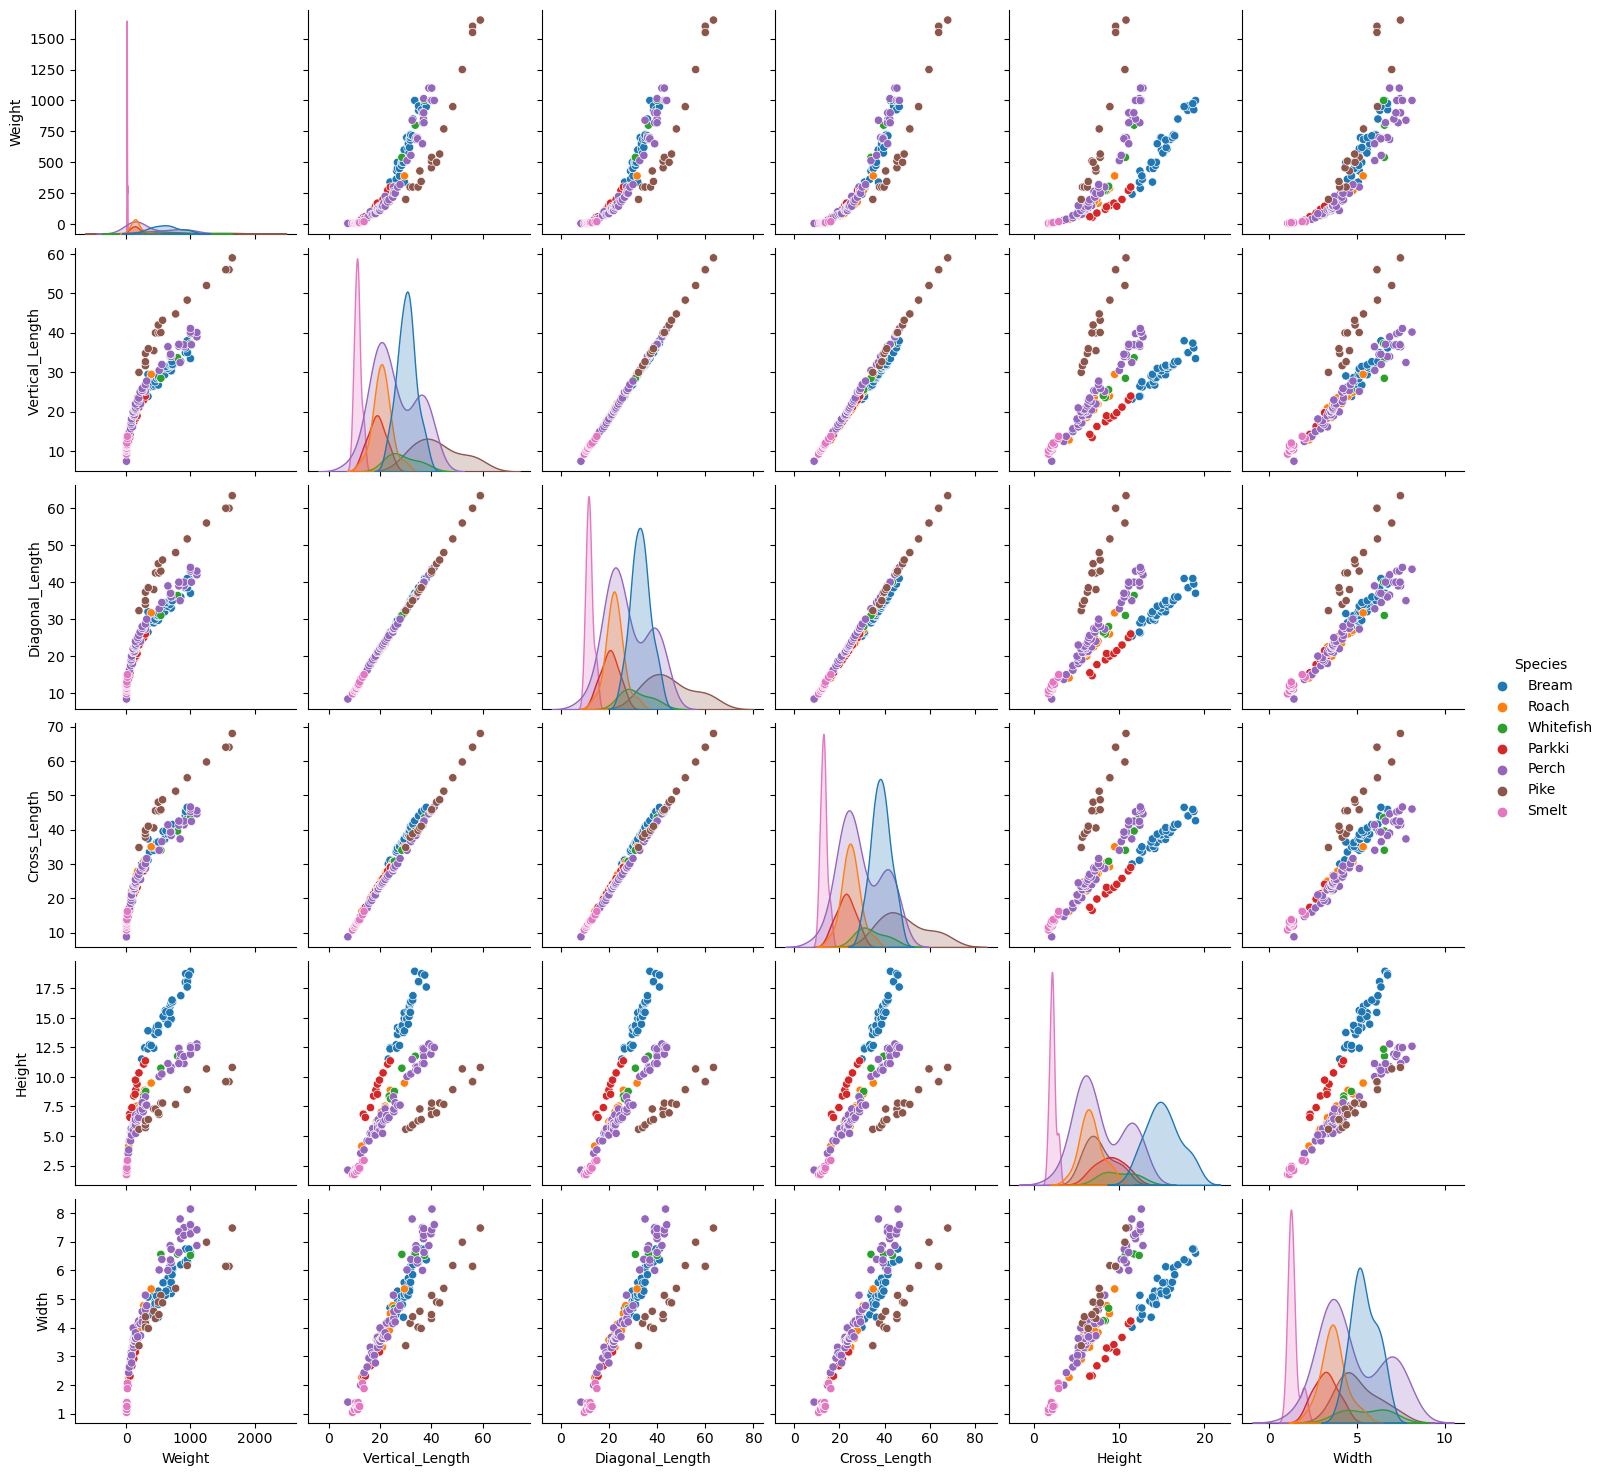

In [89]:
sns.pairplot(df, kind="scatter", hue='Species')
plt.show()

In [65]:
import pandas as pd
df = pd.read_csv('fish2.csv')

In [66]:
df = df[df['Species'].isin(['Pike', 'Perch', 'Bream', 'Parkki'])]
df.sample(5)

,Species,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
91,Perch,150.0,20.5,22.5,24.0,6.7920,3.6240
61,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142
76,Perch,100.0,16.2,18.0,19.2,5.2224,3.3216
69,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
86,Perch,120.0,20.0,22.0,23.5,5.6400,3.5250


In [34]:
y = df['Weight']
# Selected features
X = df[[
#         'Diagonal_Length', 
#         'Height', 
        'Cross_Length',
#         'Vertical_Length ',
#         'Width'

]]


# split to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,  test_size = 0.30, random_state = 0)


# normalize our features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# # intitalize logistic regression
from sklearn.linear_model import LogisticRegression, LinearRegression
lr = LinearRegression()


# fir the model
lr.fit(x_train, y_train)

lr.score(x_test, y_test)

0.84265507821501

<AxesSubplot:>

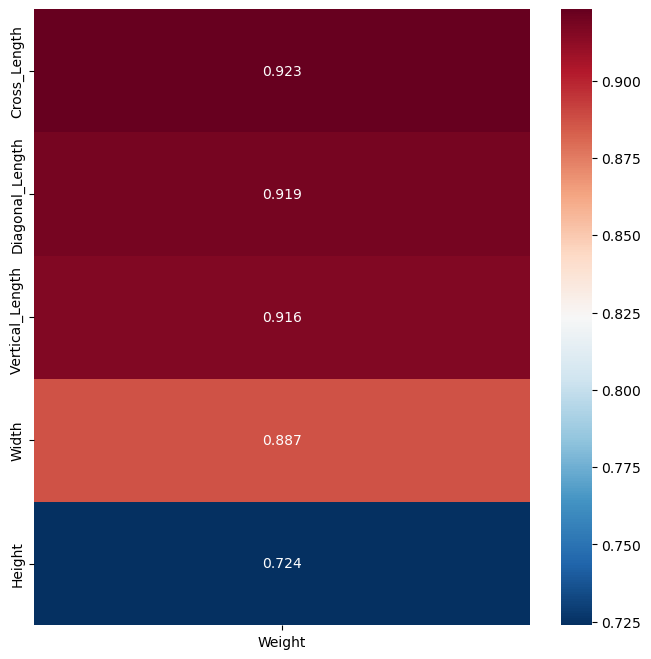

In [33]:
#
import seaborn as sns
import matplotlib.pyplot as plt

# Use the `.corr()` method on `data_matrix` to get the correlation matrix 
X_corr = df.corr()


plt.figure(figsize=(8, 8)) 
corr_matrix = df.corr()
 
# # Isolate the column corresponding to `Winnings`
corr_target = corr_matrix[['Weight']].drop(labels=['Weight'])
corr_target = corr_target.sort_values(by=['Weight'], ascending=False)

sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')

0.84265507821501

In [59]:
# import warnings
# warnings.filterwarnings('ignore')
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# # true value vs prediction on training set
# print(classification_report(y_test,y_pred))

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(x_test)
model_matrix = confusion_matrix(y_test, y_pred)

model_matrix

array([[12,  0,  0,  0],
       [ 0,  0,  2,  0],
       [ 0,  0, 17,  0],
       [ 0,  0,  0,  5]], dtype=int64)

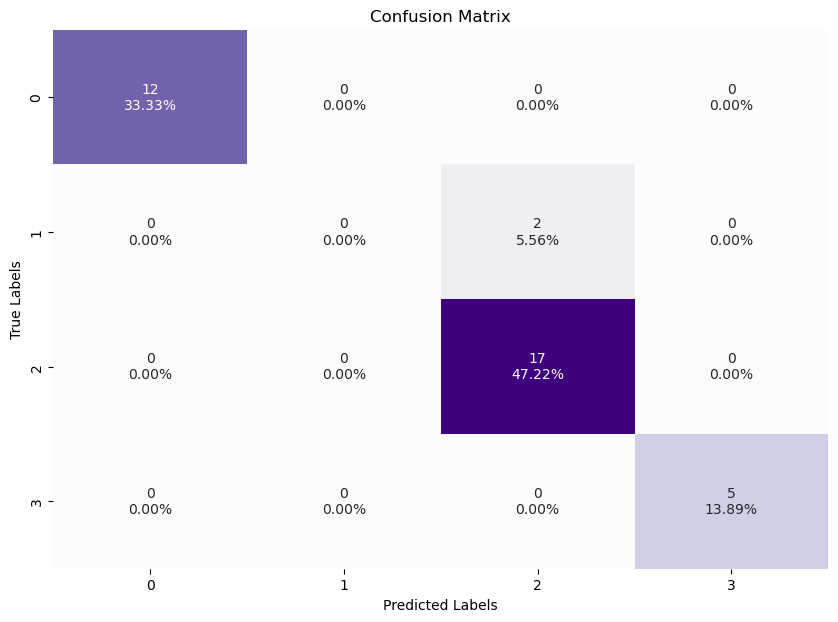

In [71]:
# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(10, 7))

# Create labels for the heatmap
group_counts = ['{0:0.0f}'.format(value) for value in model_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in model_matrix.flatten() / np.sum(model_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(model_matrix.shape)

# Create the heatmap
sns.heatmap(model_matrix, annot=labels, fmt='', cmap='Purples', ax=ax, cbar=False)

# Add title and labels for better context
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Show the plot
plt.show()

In [11]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X, y,  test_size = 0.30, random_state = 0)

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()

# lr.fit(x_train, y_train)

# lr.score(x_test,y_test), lr.score(x_train,y_train)

In [ ]:
0.8429208663185805, 0.8618394490070933)
(0.8568250066304439, 0.8730689854287448)
(0.8627940928521787, 0.8804978213259467)
(0.8642765388927481, 0.8829832140326022)
(0.8504446106682093, 0.888655686574421)

In [27]:
# df.info()

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the `.corr()` method on `data_matrix` to get the correlation matrix 
X_corr = df.corr()


plt.figure(figsize=(8, 8)) 
corr_matrix = df.corr()
 
# # Isolate the column corresponding to `Winnings`
corr_target = corr_matrix[['Weight']].drop(labels=['Weight'])
# corr_target = corr_target.sort_values(by=['Weight'], ascending=False)

# sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')

<Figure size 800x800 with 0 Axes>

<AxesSubplot:>

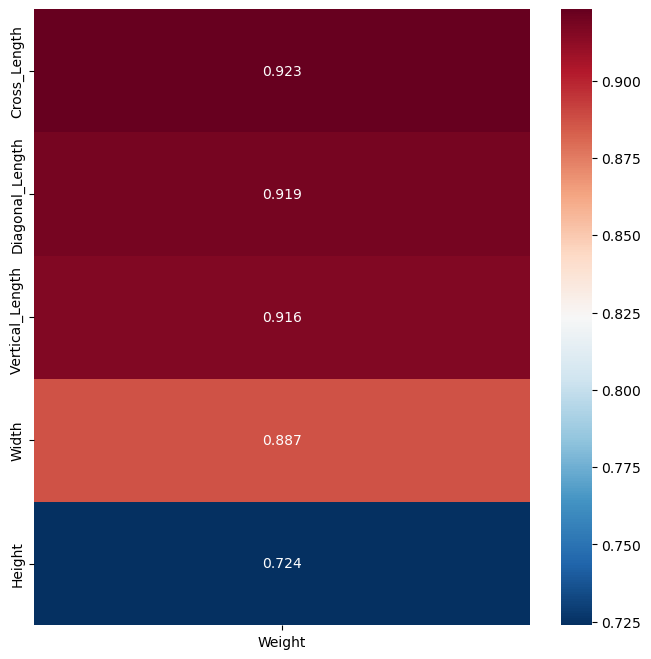

In [49]:
# # # Heatmap code:
# plt.figure(figsize=(8,5))
# # red_blue = sns.diverging_palette(220, 20, as_cmap=True)
# sns.heatmap(X_corr, annot = True)
# plt.show()

In [64]:
df.head()

,Species,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [12]:
y = df['Weight']
# X = df.drop(columns=['Weight', 'Species'])
X = df[['Cross_Length', 'Height']]

In [107]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Input variable here:
number_of_features = 5
scoring_method = 'r2'
number_of_features


lr = LinearRegression()

sffs = SFS(lr,
        k_features=number_of_features,
        forward= True,
        floating= True,
        scoring=scoring_method,
        cv=0)

# Note: our X values here are not standarized or
# does sffs automatically standarized our features?
# should I just fit the x_train, y_train here?
# (code edited from fit to fit_transform 10/13/22 -alyx)
sffs.fit_transform(X, y)
print('SFFS selected features:')

# Saving a copy of sffs selected features in a list variable
X_sffs = list(sffs.subsets_[number_of_features]['feature_names'])

print(X_sffs)    
print('\n' + str(scoring_method) + ': ' +  str(sffs.subsets_[number_of_features]['avg_score']))

SFFS selected features:
['Vertical_Length ', 'Diagonal_Length', 'Cross_Length', 'Height', 'Width']

r2: 0.8854815220690125


In [90]:
X.columns

Index(['Vertical_Length ', 'Diagonal_Length', 'Cross_Length', 'Height',
       'Width'],
      dtype='object')

In [104]:
sbfs = SFS(lr,
            k_features=1,
            forward= False,
            floating= True,
            scoring=scoring_method,
            cv=0)
sbfs.fit_transform(X, y)
print('SBFS selected features:')

# Saving a copy of sbfs selected features in a list variable
X_sbfs = list(sbfs.subsets_[1]['feature_names'])

print(X_sbfs)
print('\n' + str(scoring_method) + ': ' +  str(sbfs.subsets_[1]['avg_score']))

SBFS selected features:
['Vertical_Length ']

r2: 0.8385421598112646


C:\Users\Toto\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Toto\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


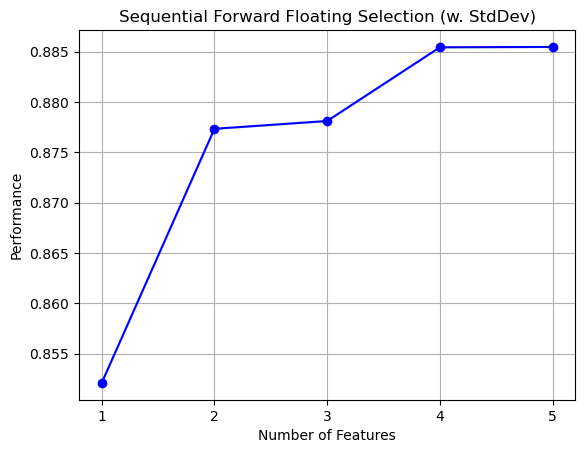

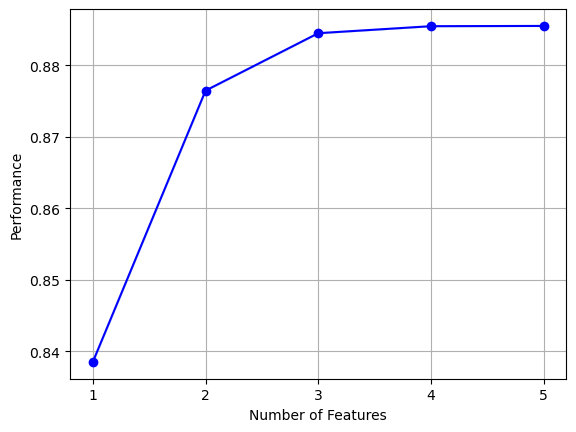

In [108]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


# Visualize sffs
# Visualize in DataFrame (Optional, Uncomment to view)
# pd.DataFrame.from_dict(ssfs.get_metric_dict()).T

fig1 = plot_sfs(sffs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Floating Selection (w. StdDev)')
plt.grid()
plt.show()

#Visualize sbfs
fig2 = plot_sfs(sbfs.get_metric_dict(), kind='std_dev')
plt.title('')
plt.grid()
plt.show()

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression, RFE, SelectKBest, f_regression

# Setting a varible 'X_standard' so that our original X features will remain unaffected incase we re-run this code
X_standard = StandardScaler().fit_transform(X)
    
rfe = RFE(lr, n_features_to_select=3)
    
rfe.fit(X_standard,y)
    
rfe_features = [f for (f, support) in zip(X, rfe.support_) if support]
print('RFE selected features:')
X_rfe = rfe_features
print(X_rfe)
print('\nrfe score: '+ str(rfe.score(X_standard,y)))

RFE selected features:
['Vertical_Length ', 'Cross_Length', 'Height']

rfe score: 0.8844676128092829


In [132]:
# because we want to specify additional arguments (random_state=0) 
# besides the features and targets inputs, we’ll need the help of the partial()
# score_function = partial(test_method, random_state=0)
selection = SelectKBest(score_func = f_regression, k = 3)
 
# fit the fata    
selection.fit_transform(X, y)

X_f_regression = X[X.columns[selection.get_support(indices=True)]]
X_f_regression = list(X_f_regression)
X_f_regression

['Vertical_Length ', 'Diagonal_Length', 'Cross_Length']

In [131]:
selection = SelectKBest(score_func = mutual_info_regression, k = 3)
 
# fit the fata    
selection.fit_transform(X, y)

# saving a copy of mutual_info_classifslected features in a list
X_mutual_info_regression = X[X.columns[selection.get_support(indices=True)]]
X_mutual_info_regression = list(X_mutual_info_regression)
X_mutual_info_regression

['Vertical_Length ', 'Diagonal_Length', 'Cross_Length']

In [152]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target

chi2_selector = SelectKBest(score_func=chi2, k=4)
X_kbest_chi2 = chi2_selector.fit_transform(X, y)
print("Selected features shape (Chi-Square):", X_kbest_chi2.shape)



Selected features shape (Chi-Square): (150, 4)


In [153]:
f_selector = SelectKBest(score_func=f_classif, k=4)
X_kbest_f = f_selector.fit_transform(X, y)
print("Selected features shape (ANOVA F-test):", X_kbest_f.shape)


Selected features shape (ANOVA F-test): (150, 4)


In [157]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2


# Extract the numerical columns
X = df.iloc[:,2:]
y = df['Species']

In [167]:
chi2_selector = SelectKBest(chi2, k=1)  # Select top 5 features
X_kbest = chi2_selector.fit_transform(X, y)


selected_feature_indices = chi2_selector.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]
selected_feature_names


Index(['Cross_Length'], dtype='object')

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,  test_size = 0.30, random_state = 0)